# Visualizing the Elllipticity-Ellipticity Correlation Function

#### Spencer Everett, SLAC 7/22/2015

It is difficult to have an intuitive understanding of the ellipticity-ellipticity correlation function. Here we demonstrate how different galaxy alignments lead to different values of each component of the $\varepsilon-\varepsilon$ correlation function.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy as sp
import os,sys
import astropy.io.fits as pyfits
import matplotlib.pyplot as plt
import cmath
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
%matplotlib inline

In [3]:
# Pangloss:
PANGLOSS_DIR = os.path.expandvars("$PANGLOSS_DIR")
sys.path.append(PANGLOSS_DIR)
import pangloss

In [4]:
K = pangloss.Kappamap(PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.kappa',FITS=False)

In [5]:
S = pangloss.Shearmap([PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma_1',PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma_2'],FITS=False)

In [6]:
B = pangloss.BackgroundCatalog(N=100,sigma_e=0.01,domain=[1.55,1.52,-1.61,-1.59],field=[0,0,0,0]) # High ellipticity used to highlight the intrinsic shape of background sources

First let's plot some pre-lensed background galaxies represented as blue ellipticity sticks in a region containing a potential weak lens.

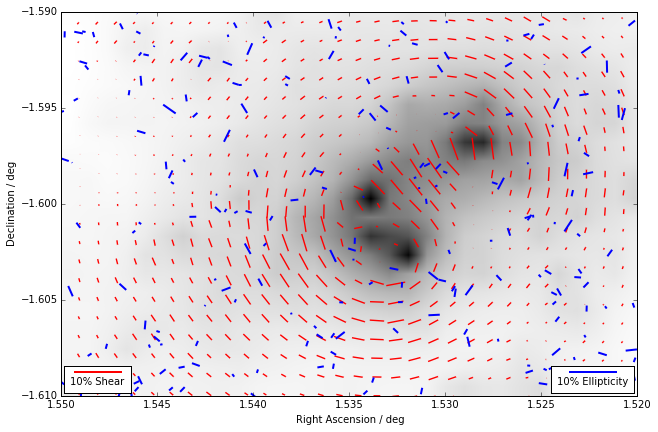

In [7]:
K.plot(subplot=[1.55,1.52,-1.61,-1.59])
S.plot()
B.plot(graph='stick',lensed='none')

As the background sources are generated with uniformly distributed orientation angles, we would expect there to be no correlation between the galaxy orientations at any separation distance. One way to quantify this is with a correlation function.

(Add section with corr function definition and reference the derivation document in `pangloss/docs`)

To get a better sense of what is happening inside the correlation function, we can plot the value of each component as a function of the initial angle of the first galaxy and of the difference in angle between the two.

(Add more!!)

The folowing correlation component notation is used:

$\xi_+=$ `xi_p`

$\xi_-=$ `xi_m`

$\xi_\times=$ `xi_x`

$\xi^\prime_\times=$ `xi_xp`

(Add more!!!)

Calculating each component for $\theta_i,\Delta\theta\in(0^\circ,180^\circ)$:

In [8]:
xi_p,xi_m,xi_x,xi_xp = pangloss.plotting.calc_corr_demo()

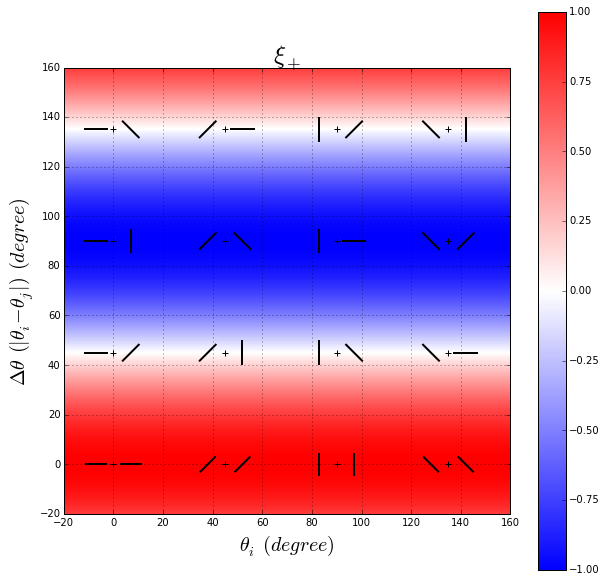

In [9]:
pangloss.plotting.plot_corr_demo(xi_p,corr_type='plus')

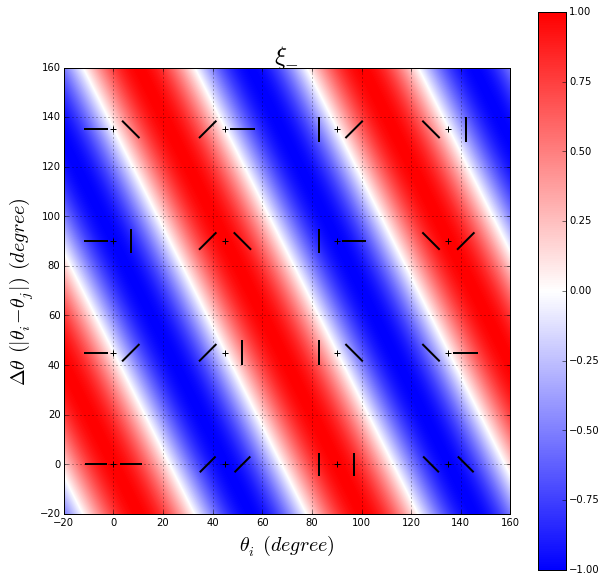

In [10]:
pangloss.plotting.plot_corr_demo(xi_m,corr_type='minus')

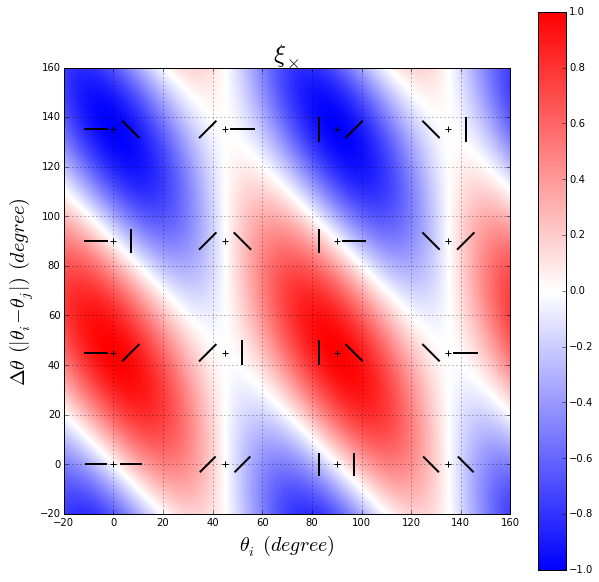

In [11]:
pangloss.plotting.plot_corr_demo(xi_x,corr_type='cross')

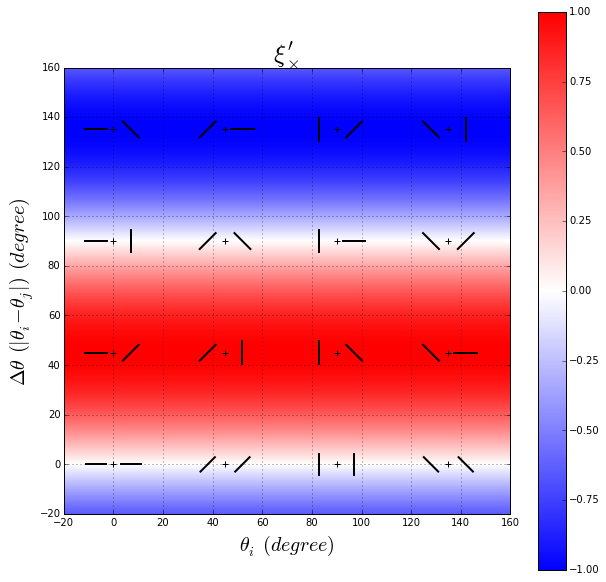

In [12]:
pangloss.plotting.plot_corr_demo(xi_xp,corr_type='crossp')

## Color-Coded Correlation

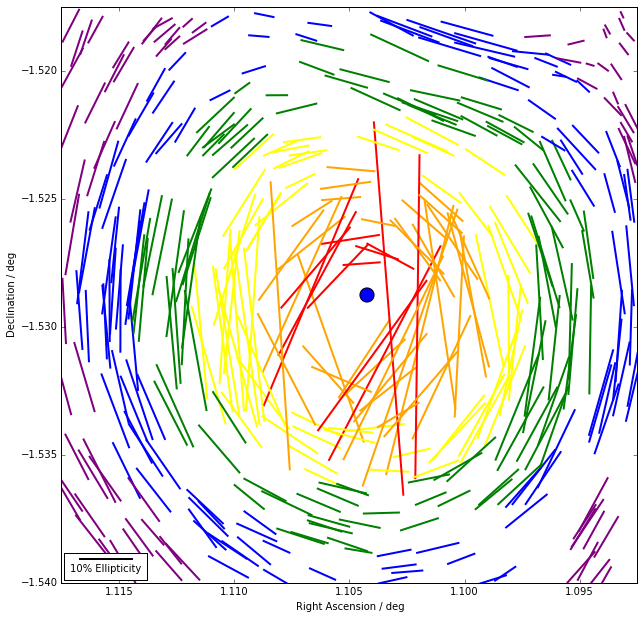

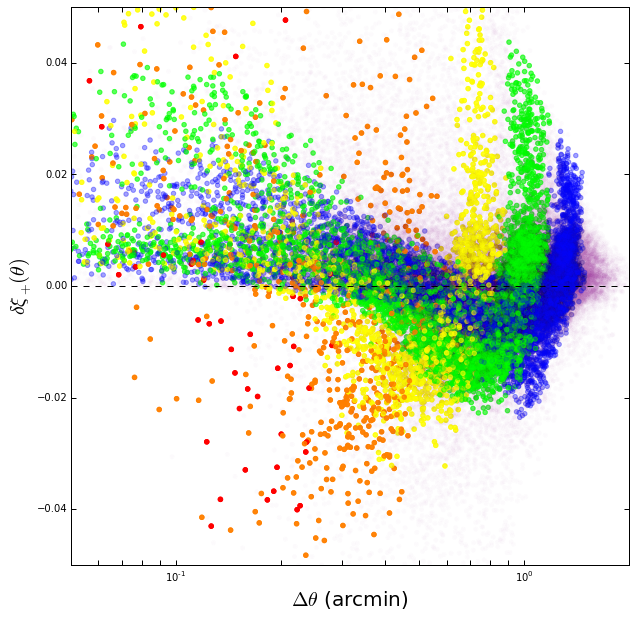

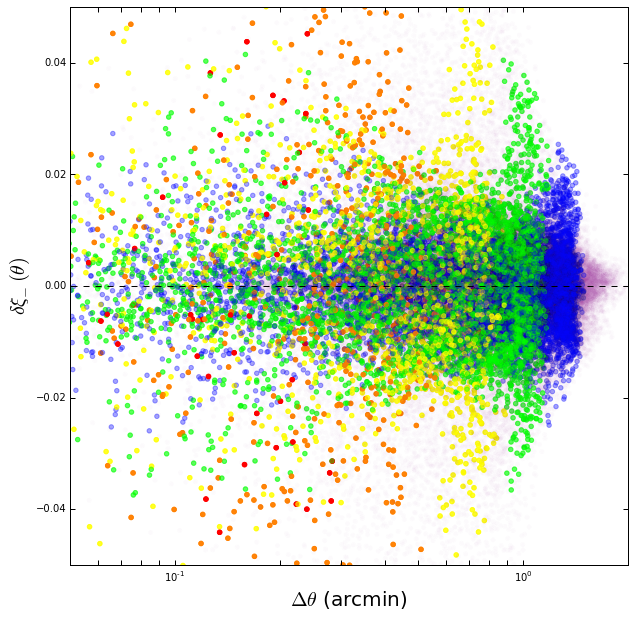

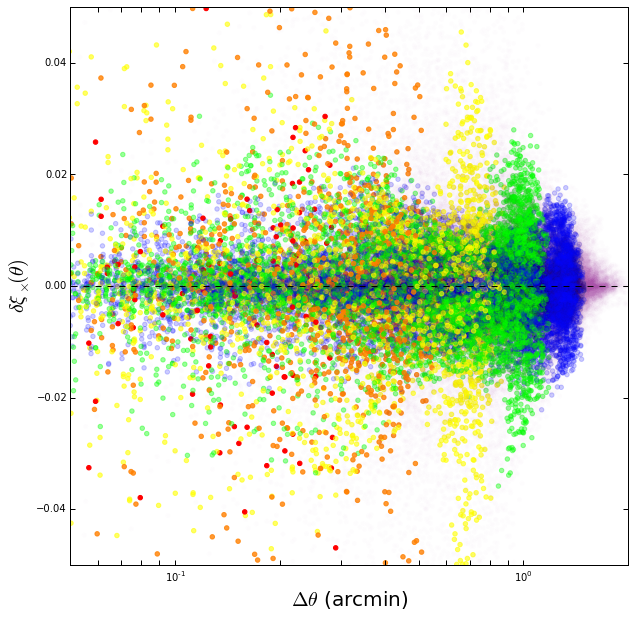

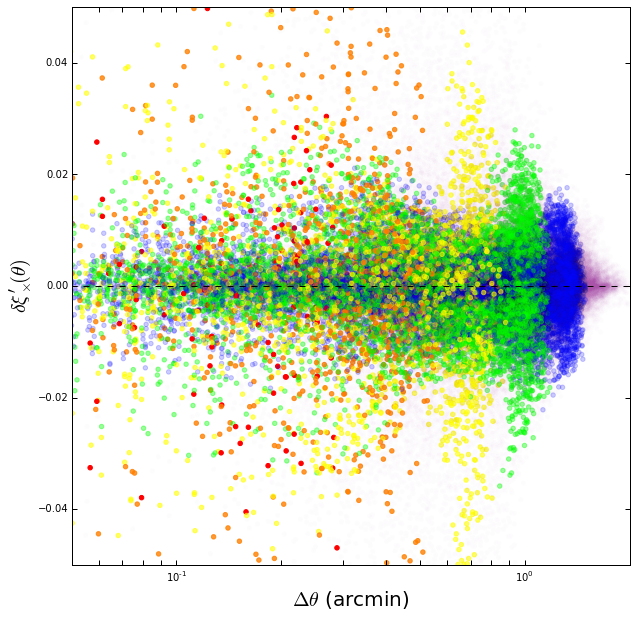

In [13]:
r,del_xi_p,del_xi_m,del_xi_x,del_xi_xp,c = pangloss.plotting.plot_corr_color_demo(N=200)

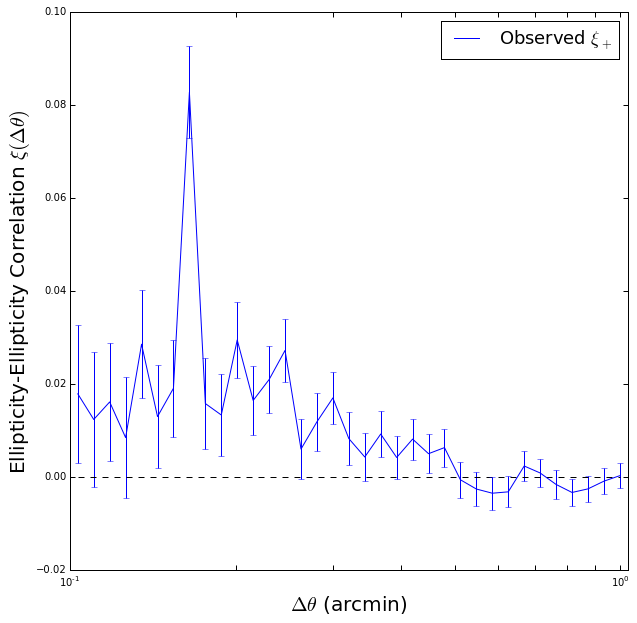

In [14]:
# Create a background catalog and lens the galaxies
B = pangloss.BackgroundCatalog(N=200,sigma_e=0.01,domain=[1.1175,1.0925,-1.54,-1.515],field=[0,0,0,0])
B.lens_by_map(K,S)

gg=B.calculate_corr(min_sep=0.1,max_sep=1.0)
pangloss.plot_corr(gg,corr_type='gg',corr_comp='plus',lensed='map',color='blue')